# Importowanie Bibliotek
Import niezbędnych bibliotek: TensorFlow, Keras, NumPy, Pandas oraz bibliotek do przetwarzania danych.

In [1]:
# Importowanie Bibliotek
import tensorflow as tf #type: ignore
from tensorflow import keras #type: ignore
from tensorflow.keras import Sequential #type: ignore
from tensorflow.keras.layers import Dense, Dropout #type: ignore
from tensorflow.keras.optimizers import Adam #type: ignore
from tensorflow.keras.callbacks import EarlyStopping #type: ignore
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Wczytanie i Przefiltrowanie Danych
Import bibliotek, wczytanie danych i wybranie 20 najliczniejszych gatunków piwa. Użycie value_counts() i nlargest() do filtrowania.

In [2]:
# Wczytanie danych z pliku CSV
data = pd.read_csv('data.csv')

# Wybór 20 najliczniejszych gatunków piwa
top_20_styles = data['Style'].value_counts().nlargest(20).index
filtered_data = data[data['Style'].isin(top_20_styles)]

# Wybór tylko numerycznych kolumn do treningu
numeric_columns = ['Size(L)', 'OG', 'FG', 'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency']
X = filtered_data[numeric_columns].copy()

# Uzupełnienie brakujących wartości średnią
X = X.fillna(X.mean())

# Przygotowanie etykiet (gatunków piwa)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(filtered_data['Style'])

# Normalizacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Konwersja etykiet na format kategoryczny
num_classes = len(np.unique(y))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Wyświetlenie kształtu zbiorów danych
print("Kształt danych treningowych:", X_train.shape)
print("Kształt danych testowych:", X_test.shape)
print("Kształt etykiet treningowych:", y_train.shape)
print("Kształt etykiet testowych:", y_test.shape)

Kształt danych treningowych: (34216, 10)
Kształt danych testowych: (8554, 10)
Kształt etykiet treningowych: (34216, 20)
Kształt etykiet testowych: (8554, 20)


# Policzenie liczby piw dla top 20 gatunków


Top 20 najczęstszych gatunków piwa:
American IPA: 11940 piw
American Pale Ale: 7581 piw
Saison: 2617 piw
American Light Lager: 2277 piw
American Amber Ale: 2038 piw
Blonde Ale: 1753 piw
Imperial IPA: 1478 piw
American Stout: 1268 piw
Irish Red Ale: 1204 piw
American Brown Ale: 1152 piw
Witbier: 1072 piw
California Common Beer: 1044 piw
Weissbier: 988 piw
Oatmeal Stout: 961 piw
Russian Imperial Stout: 929 piw
Weizen/Weissbier: 919 piw
Sweet Stout: 919 piw
Robust Porter: 897 piw
K�lsch: 869 piw
Double IPA: 864 piw


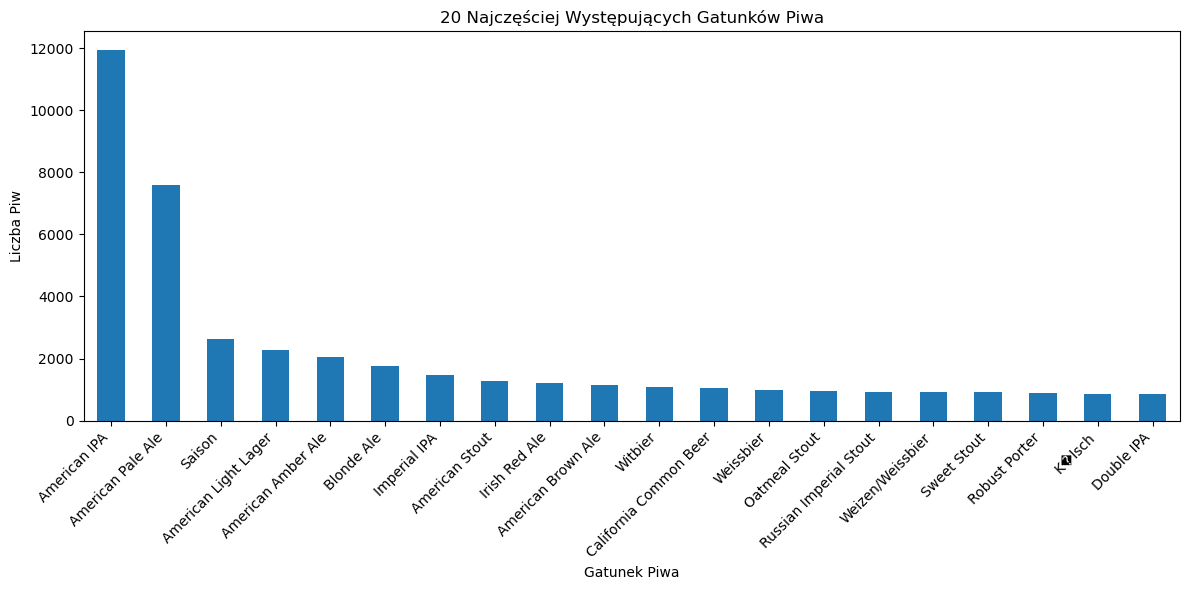

In [3]:
top_20_gatunkow = data['Style'].value_counts().head(20)

# Wyświetlenie wyników
print("Top 20 najczęstszych gatunków piwa:")
print("====================================")
for gatunek, liczba in top_20_gatunkow.items():
    print(f"{gatunek}: {liczba} piw")

# Wizualizacja
plt.figure(figsize=(12, 6))
top_20_gatunkow.plot(kind='bar')
plt.title('20 Najczęściej Występujących Gatunków Piwa')
plt.xlabel('Gatunek Piwa')
plt.ylabel('Liczba Piw')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Utworzenie Modelu
Utworzenie modelu sekwencyjnego z warstwami Dense, dostosowanie liczby neuronów w warstwie wyjściowej do 20 klas.

In [4]:
# Utworzenie Modelu

# Definiowanie modelu sekwencyjnego z warstwami Dense
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Warstwa wejściowa
    Dense(64, activation='relu'),  # Warstwa ukryta
    Dense(32, activation='relu'),  # Warstwa ukryta
    Dense(20, activation='softmax')  # Warstwa wyjściowa z 20 neuronami dla 20 klas
])

# Kompilacja modelu
model.compile(optimizer='adam',  # Użycie optymalizatora Adam
              loss='categorical_crossentropy',  # Funkcja straty do klasyfikacji wieloklasowej
              metrics=['accuracy'])  # Metryka do oceny modelu

# Wyświetlenie podsumowania modelu
model.summary()  # Podsumowanie architektury modelu

d:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           660 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,404 (48.45 KB)

 Trainable params: 12,404 (48.45 KB)

 Non-trainable params: 0 (0.00 B)

# Trenowanie Modelu
Trenowanie modelu na przefiltrowanych danych, wizualizacja procesu uczenia za pomocą wykresów.

Epoch 1/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3862 - loss: 2.0344 - val_accuracy: 0.4908 - val_loss: 1.5663
Epoch 2/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4941 - loss: 1.5355 - val_accuracy: 0.4978 - val_loss: 1.5258
Epoch 3/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5066 - loss: 1.4842 - val_accuracy: 0.5108 - val_loss: 1.4895
Epoch 4/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5178 - loss: 1.4501 - val_accuracy: 0.5067 - val_loss: 1.4734
Epoch 5/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5234 - loss: 1.4414 - val_accuracy: 0.5260 - val_loss: 1.4495
Epoch 6/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5246 - loss: 1.4097 - val_accuracy: 0.5194 - val_loss: 1.4530
Epoch 7/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5242 - loss: 1.4165 - val_accuracy: 0.5247 - val_loss: 1.4408
Epoch 8/50
856/856 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5277 - loss: 1.4067 - val_accuracy: 0.

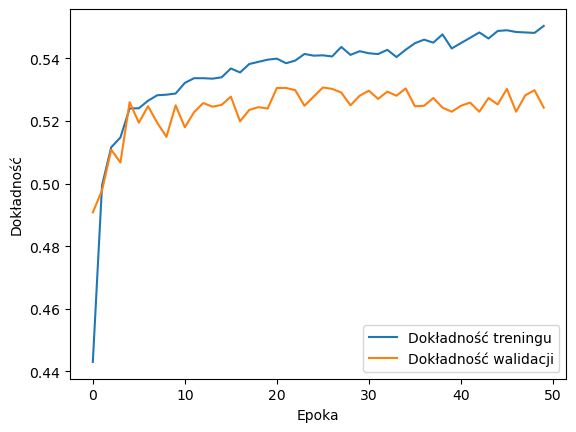

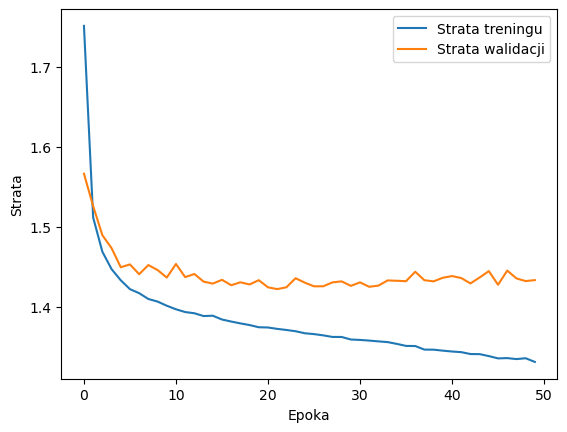

In [5]:
# Trenowanie Modelu

# Trenowanie modelu na danych treningowych z określoną liczbą epok i rozmiarem batcha
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Wykres dokładności
plt.plot(history.history['accuracy'], label='Dokładność treningu')
plt.plot(history.history['val_accuracy'], label='Dokładność walidacji')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
plt.show()

# Wykres straty
plt.plot(history.history['loss'], label='Strata treningu')
plt.plot(history.history['val_loss'], label='Strata walidacji')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.legend()
plt.show()

# Ewaluacja
Ocena modelu na zbiorze testowym, generowanie macierzy pomyłek i raportu klasyfikacji dla 20 wybranych gatunków.

268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.5306 - loss: 1.4156
Test Loss: 1.4128881692886353
Test Accuracy: 0.5309796333312988
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step
                        precision    recall  f1-score   support

    American Amber Ale       0.43      0.45      0.44       390
    American Brown Ale       0.43      0.58      0.49       205
          American IPA       0.66      0.79      0.72      2394
  American Light Lager       0.42      0.21      0.28       450
     American Pale Ale       0.58      0.61      0.59      1562
        American Stout       0.43      0.50      0.46       258
            Blonde Ale       0.37      0.43      0.40       314
California Common Beer       0.00      0.00      0.00       216
            Double IPA       0.28      0.03      0.06       160
          Imperial IPA       0.48      0.39      0.43       310
         Irish Red Ale       0.60      0.51      0.55       255
                K�lsch       0.37      0.47    

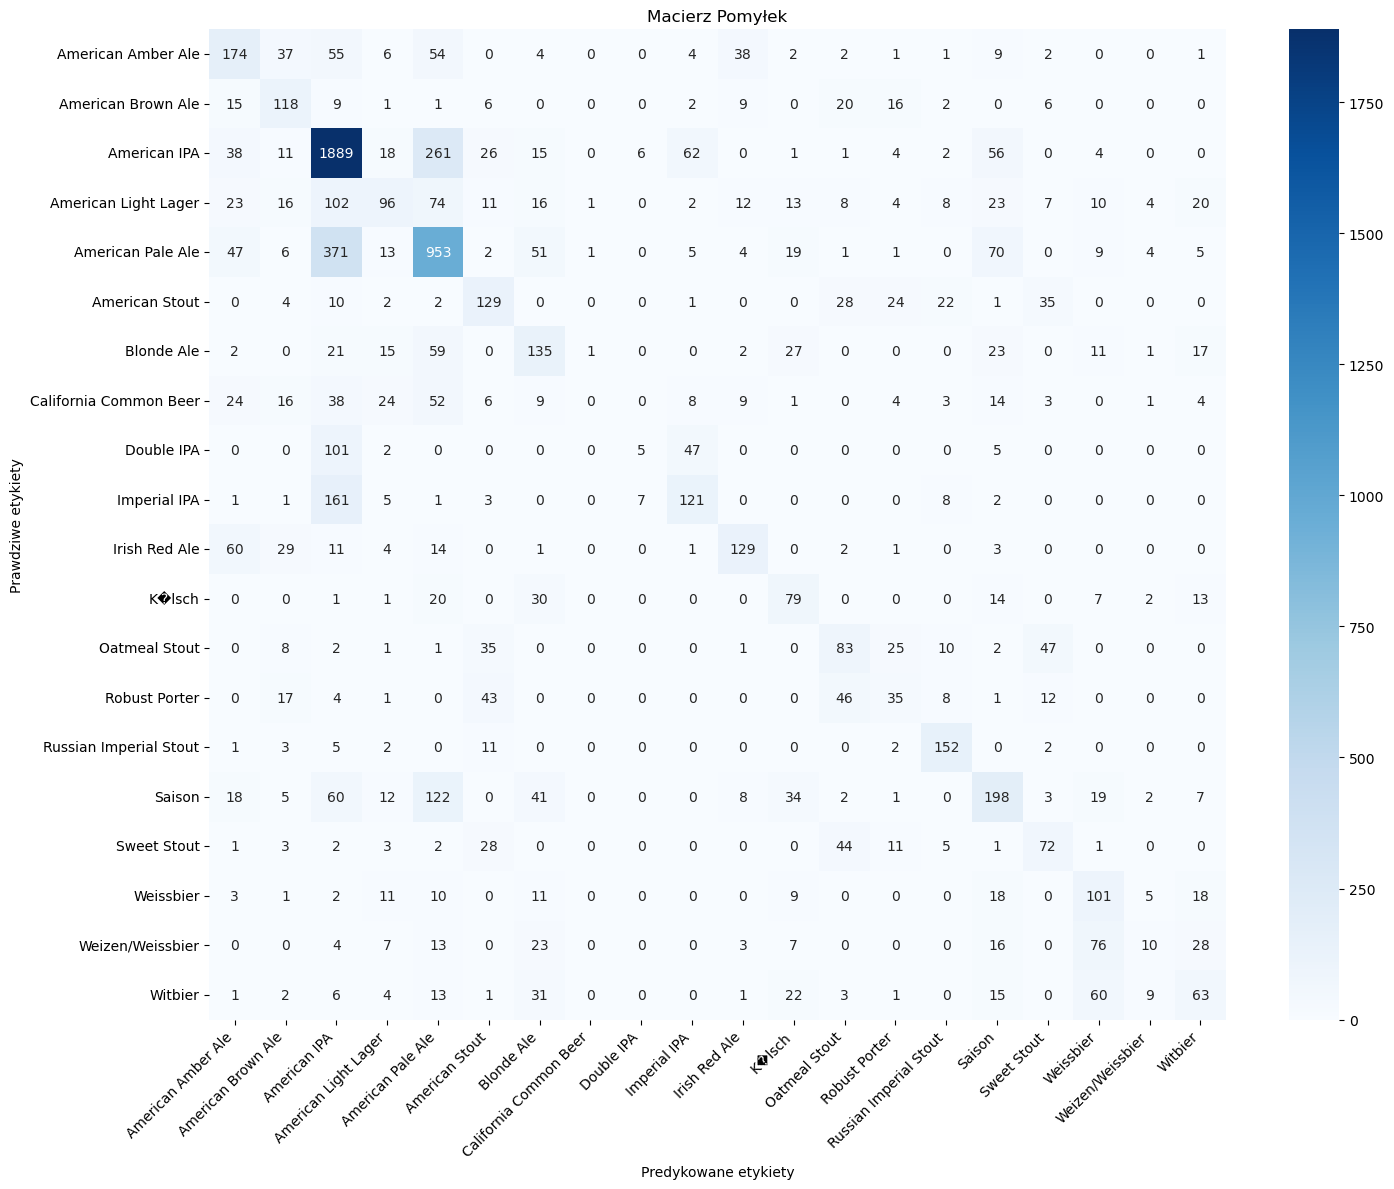

In [12]:
# Ewaluacja
# Ocena modelu na zbiorze testowym
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Predykcje na zbiorze testowym
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)  # Konwersja one-hot na indeksy klas

print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_))

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(15, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.xlabel('Predykowane etykiety')
plt.ylabel('Prawdziwe etykiety')
plt.title('Macierz Pomyłek')
plt.tight_layout()
plt.show()

In [17]:
# Konwersja y_test na etykiety klas
y_test_classes = np.argmax(y_test, axis=1)

# Policzenie liczby piw w każdym stylu w zbiorze testowym
unique, counts = np.unique(y_test_classes, return_counts=True)
style_counts = dict(zip(unique, counts))

# Wyświetlenie wyników
for style, count in sorted(style_counts.items(), key=lambda x: x[1], reverse=True):

    print(f"Styl {style}: {count} piw")

Styl 2: 2394 piw
Styl 4: 1562 piw
Styl 15: 532 piw
Styl 3: 450 piw
Styl 0: 390 piw
Styl 6: 314 piw
Styl 9: 310 piw
Styl 5: 258 piw
Styl 10: 255 piw
Styl 19: 232 piw
Styl 7: 216 piw
Styl 12: 215 piw
Styl 1: 205 piw
Styl 17: 189 piw
Styl 18: 187 piw
Styl 14: 178 piw
Styl 16: 173 piw
Styl 11: 167 piw
Styl 13: 167 piw
Styl 8: 160 piw


# Zapisywanie Modelu
Zapisanie wytrenowanego modelu do pliku i przetestowanie jego wczytywania.

In [13]:
# Zapisywanie Modelu

# Zapisanie wytrenowanego modelu do pliku dla późniejszego wykorzystania
model.save('model_klasyfikacji_20_styli_piwa.h5')

# Wczytanie modelu z pliku
loaded_model = keras.models.load_model('model_klasyfikacji_20_styli_piwa.h5')

# Sprawdzenie, czy wczytany model działa poprawnie
loaded_model.summary()

# Ocena wczytanego modelu na zbiorze testowym
loaded_test_loss, loaded_test_accuracy = loaded_model.evaluate(X_test, y_test)

print(f'Loaded Test Loss: {loaded_test_loss}')
print(f'Loaded Test Accuracy: {loaded_test_accuracy}')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           660 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,406 (48.46 KB)

 Trainable params: 12,404 (48.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.5306 - loss: 1.4156
Loaded Test Loss: 1.4128881692886353
Loaded Test Accuracy: 0.5309796333312988


In [20]:
# Funkcja do przewidywania gatunku piwa
def przewiduj_gatunek_piwa(dane):
    # Sprawdzenie, czy model jest załadowany
    if 'model' not in globals():
        global model
        model = keras.models.load_model('model_klasyfikacji_piwa.h5')
    
    # Normalizacja danych wejściowych
    dane_scaled = scaler.transform([dane])
    
    # Przewidywanie gatunku piwa
    predykcja = model.predict(dane_scaled)
    gatunek_index = np.argmax(predykcja, axis=1)[0]
    gatunek = label_encoder.inverse_transform([gatunek_index])[0]
    
    return gatunek

"""
    'Size(L)': 20.0,              # Typowa wielkość warzenia w litrach
    'OG': 1.050,                 # Początkowa gęstość, często 1.045 - 1.060
    'FG': 1.010,                 # Końcowa gęstość, zazwyczaj 1.008 - 1.014
    'ABV': 5.4,                  # Zawartość alkoholu w %, tu podana konkretna
    'IBU': 35,                   # Goryczka, typowo w zakresie 30 - 50
    'Color': 10,                 # Kolor w SRM, odpowiednik około 20 EBC
    'BoilSize': 25.0,            # Objętość brzeczki przed gotowaniem w litrach
    'BoilTime': 60,              # Czas gotowania w minutach, standardowo 60
    'BoilGravity': 1.045,        # Gęstość przed gotowaniem, nieco niższa niż OG
    'Efficiency': 75             # Wydajność procesu, typowo 70-75%
"""

# Przykładowe dane do przewidywania
Zywiec_APA = numeric_columns = [20.0, 1.050, 1.010, 5.4, 35, 10, 25.0, 60, 1.045, 75]

gatunek = przewiduj_gatunek_piwa(Zywiec_APA)
print(f'Przewidywany gatunek piwa: {gatunek}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Przewidywany gatunek piwa: American Pale Ale


d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
